# Sharded Cellpose Segmentation on human protein atlas images with downsampling

In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import ShardedCytosolSegmentationDownsamplingCellpose
from scportrait.pipeline.selection import LMDSelection

/Users/sophia/mambaforge/envs/scportrait_test/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_location = "project_downsampling_sharded"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example2.yml",
    overwrite=True,
    debug=True,
    segmentation_f=ShardedCytosolSegmentationDownsamplingCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[27/02/2025 18:13:37] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/config.yml
[27/02/2025 18:13:37] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ShardedCytosolSegmentationDownsamplingCellpose_mqxf3jpz for ShardedCytosolSegmentationDownsamplingCellpose
[27/02/2025 18:13:37] Compression algorithm for extracted single-cell images: lzf
[27/02/2025 18:13:37] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.
[27/02/2025 18:13:37] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.


In [3]:
from scportrait.data._datasets import dataset_2

dataset_2_path = dataset_2()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_2_path}/Ch1.tif", f"{dataset_2_path}/Ch2.tif", f"{dataset_2_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[27/02/2025 18:13:37] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_8cwf1pmz for Project
[27/02/2025 18:13:38] Image input_image written to sdata object.
[27/02/2025 18:13:38] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_8cwf1pmz'>


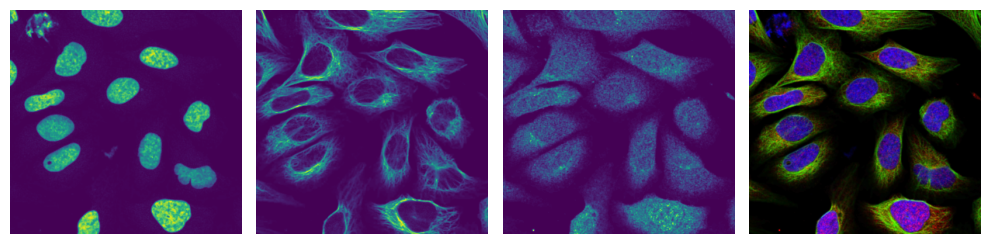

In [ ]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time
from scportrait.plotting.vis import generate_composite

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(project.input_image[0])
axs[0].axis("off")

axs[1].imshow(project.input_image[1])
axs[1].axis("off")

axs[2].imshow(project.input_image[2])
axs[2].axis("off")

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off")

fig.tight_layout()

In [5]:
project.segment()

[27/02/2025 18:13:38] Mapped input image to memory-mapped array.
[27/02/2025 18:13:38] Created new shard directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/segmentation/tiles
[27/02/2025 18:13:38] target size 120000000 is equal or larger to input image 86710. Sharding will not be used.
[27/02/2025 18:13:38] Saving Sharding plan to file: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/segmentation/sharding_plan.csv
[27/02/2025 18:13:38] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/CytosolSegmentationDownsamplingCellpose_daa2sxzx for CytosolSegmentationDownsamplingCellpose
[27/02/2025 18:13:38] sharding plan with 1 elements generated, sharding with 2 threads begins
[27/02/2025 18:13:38] GPU Status for segmentation is True with 1 GPUs found. Segmentation will be performed on the device mps with 2 processes p

Segmenting Image Tiles:   0%|          | 0/1 [00:00<?, ?it/s]

[27/02/2025 18:13:42] Beginning Segmentation of Shard with the slicing (slice(0, 290, None), slice(0, 299, None))
[27/02/2025 18:13:42] Time taken to load input image: 0.004674915689975023
[27/02/2025 18:13:42] Smoothing Kernel size not explicitly defined. Will calculate a default value based on the downsampling factor.
[27/02/2025 18:13:42] Performing image padding to ensure that image is compatible with selected downsample kernel size of 2.
[27/02/2025 18:13:42] Downsampling image by a factor of 2x2
[27/02/2025 18:13:42] GPU Status for segmentation is True and will segment using the following device mps.
[27/02/2025 18:13:43] Segmenting nucleus using the following model: nuclei
[27/02/2025 18:13:45] Segmenting cytosol using the following model: cyto2
[27/02/2025 18:13:45] Performing filtering to match Cytosol and Nucleus IDs.
[27/02/2025 18:13:45] Removed 1 nuclei and 0 cytosols due to filtering.
[27/02/2025 18:13:45] After filtering, 9 matching nuclei and cytosol masks remain.


Segmenting Image Tiles: 100%|██████████| 1/1 [00:07<00:00,  7.93s/it]

[27/02/2025 18:13:46] Total time to perform nucleus and cytosol mask matching filtering: 0.69 seconds
[27/02/2025 18:13:46] Filtering status for this segmentation is set to True.
[27/02/2025 18:13:46] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[27/02/2025 18:13:46] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/segmentation/tiles/0/classes.csv.
[27/02/2025 18:13:46] === Finished segmentation of shard ===
[27/02/2025 18:13:46] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/CytosolSegmentationDownsamplingCellpose_daa2sxzx'>
[27/02/2025 18:13:46] Segmentation of Shard with the slicing (slice(0, 290, None), slice(0, 299, None)) finished


[27/02/2025 18:13:47] Finished parallel segmentation
[27/02/2025 18:13:47] resolve sharding plan
[27/02/2025 18:13:47] Cleared temporary directory containing input image used for sharding.
[27/02/2025 18:13:47] Stitching tile 0
[27/02/2025 18:13:48] Time taken to cleanup overlapping shard regions for shard 0: 0.0023298263549804688s
[27/02/2025 18:13:48] Number of classes contained in shard after processing: 9
[27/02/2025 18:13:48] Number of Ids in filtered_classes after adding shard 0: 9
[27/02/2025 18:13:48] Finished stitching tile 0 in 0.7455580234527588 seconds.
[27/02/2025 18:13:48] Number of filtered classes in Dataset: 9
[27/02/2025 18:13:48] Filtering status for this segmentation is set to True.
[27/02/2025 18:13:48] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[27/02/2025 18:13:48] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_dow

(-0.5, 298.5, 289.5, -0.5)

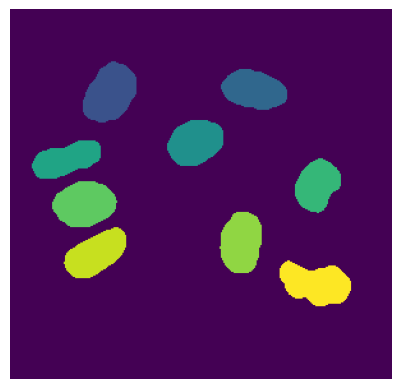

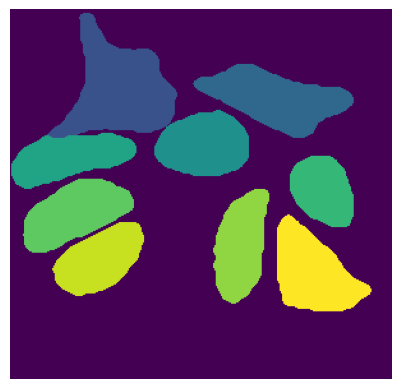

In [6]:
plt.figure()
plt.imshow(project.sdata["seg_all_nucleus"])
plt.axis("off")

plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

In [7]:
project.extract()

[27/02/2025 18:13:50] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/HDF5CellExtraction_zf4gnwss for HDF5CellExtraction
[27/02/2025 18:13:50] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data
[27/02/2025 18:13:50] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data
[27/02/2025 18:13:50] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[27/02/2025 18:13:50] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[27/02/2025 18:13:50] A total of 1 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/example

Extracting cell batches: 100%|██████████| 1/1 [00:00<00:00, 32.64it/s]


[27/02/2025 18:13:50] Finished extraction in 0.12 seconds (64.93 cells / second)
[27/02/2025 18:13:50] Benchmarking times saved to file.
[27/02/2025 18:13:50] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/HDF5CellExtraction_zf4gnwss'>


(8, 5, 110, 110)


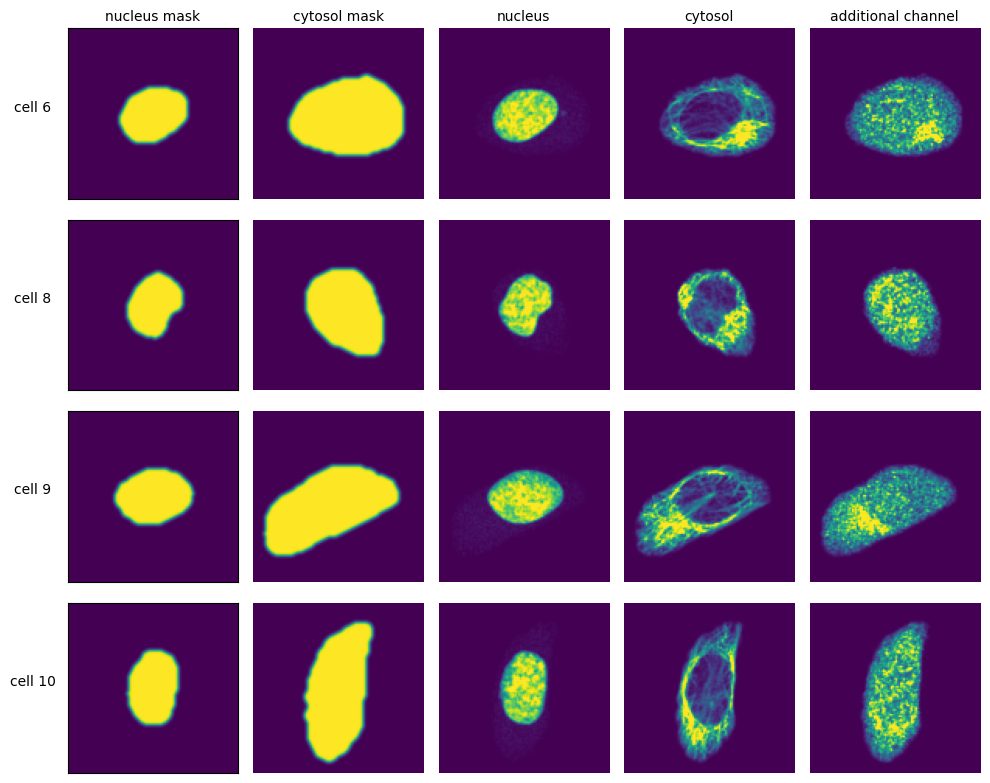

In [8]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 5, figsize=(5 * 2, len(n_cells) * 2))
    labels = ["nucleus mask", "cytosol mask", "nucleus", "cytosol", "additional channel"]

    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize=10, rotation=0, labelpad=25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")

            if i == 0:
                axs[i, n].set_title(labels[n], fontsize=10)

    fig.tight_layout()

In [9]:
project.featurize()

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data/single_cells.h5
[27/02/2025 18:13:51] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/CellFeaturizer_d4_c9m8e for CellFeaturizer
[27/02/2025 18:13:51] Started CellFeaturization of all available channels.
[27/02/2025 18:13:51] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/featurization/complete_CellFeaturizer
[27/02/2025 18:13:51] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[27/02/2025 18:13:51] Reading data from path: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data/single_cells.h5
[27/02/2025 

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,nucleus_area,cytosol_area,cytosol_only_area,1_mean_nucleus,1_median_nucleus,1_quant75_nucleus,1_quant25_nucleus,1_summed_intensity_nucleus,1_summed_intensity_area_normalized_nucleus,1_mean_cytosol,...,3_summed_intensity_cytosol,3_summed_intensity_area_normalized_cytosol,3_mean_cytosol_only,3_median_cytosol_only,3_quant75_cytosol_only,3_quant25_cytosol_only,3_summed_intensity_cytosol_only,3_summed_intensity_area_normalized_cytosol_only,label,cell_id
0,2171.0,6501.0,4330.0,0.094401,0.0,0.024994,0.0,1142.25700,0.263801,0.094401,...,2089.6729,0.482603,0.172700,0.0,0.333252,0.0,2089.6729,0.482603,0,3
1,1912.0,4568.0,2656.0,0.074075,0.0,0.010139,0.0,896.30835,0.337465,0.074075,...,1762.5309,0.663604,0.145664,0.0,0.142822,0.0,1762.5309,0.663604,0,4
2,1888.0,3983.0,2095.0,0.079451,0.0,0.004189,0.0,961.35390,0.458880,0.079451,...,1475.2004,0.704153,0.121917,0.0,0.067871,0.0,1475.2004,0.704153,0,6
3,1718.0,3012.0,1294.0,0.067254,0.0,0.000000,0.0,813.76760,0.628878,0.067254,...,1150.5413,0.889135,0.095086,0.0,0.000000,0.0,1150.5413,0.889135,0,8
4,2096.0,4286.0,2190.0,0.086380,0.0,0.006791,0.0,1045.19570,0.477258,0.086380,...,1515.9556,0.692217,0.125286,0.0,0.106750,0.0,1515.9556,0.692217,0,9
5,1945.0,3873.0,1928.0,0.076503,0.0,0.000376,0.0,925.68950,0.480129,0.076503,...,1508.1467,0.782234,0.124640,0.0,0.006575,0.0,1508.1467,0.782234,0,10
6,1954.0,3678.0,1724.0,0.073058,0.0,0.000256,0.0,884.00140,0.512762,0.073058,...,1361.4031,0.789677,0.112513,0.0,0.003231,0.0,1361.4031,0.789677,0,11
7,2165.0,4542.0,2377.0,0.081356,0.0,0.015686,0.0,984.40380,0.414137,0.081356,...,1639.8943,0.689901,0.135528,0.0,0.181763,0.0,1639.8943,0.689901,0,12
